<a href="https://colab.research.google.com/github/silverstar0727/NLP_study/blob/main/ch4_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/My Drive/kaggle_nlp

/content/drive/My Drive/kaggle_nlp


In [ ]:
import zipfile

file_list = ['labeledTrainData.tsv.zip', 'unlabeledTrainData.tsv.zip', 'testData.tsv.zip']

for file in file_list:
  zipRef = zipfile.ZipFile(file, 'r')
  zipRef.extractall()
  zipRef.close()

In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train_data = pd.read_csv('labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)

# EDA

In [ ]:
# 데이터 분석 순서
## 데이터 크기 -> 데이터 개수 -> 문자 길이 분포 -> 많이 사용된 단어 -> 긍정, 부정 데이터의 분포
## -> 각 리뷰의 단어 개수 분포 -> 특수문자 및 대문자, 소문자 비율

# os라이브러리를 이용해서 tsv파일중 zip파일이 아닌 파일들을 가져와서 크기를 출력함
print('파일 크기: ')
for file in os.listdir():
  if ('tsv' in file) and ('zip' not in file):
    print(file.ljust(30) + str(round(os.path.getsize(file) / 1000000, 2)) + 'MB')

파일 크기: 
labeledTrainData.tsv          33.56MB
unlabeledTrainData.tsv        67.28MB
testData.tsv                  32.72MB


In [ ]:
# 학습데이터 개수 출력
print(len(train_data))

25000


In [ ]:
# 각 문장의 길이 몇개만 알아보기
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

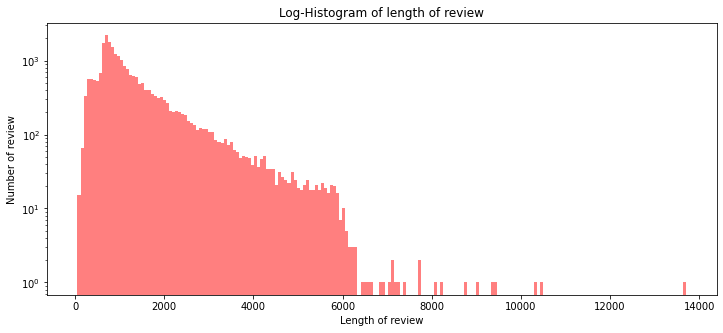

In [ ]:
# 리뷰 길이 시각화
plt.figure(figsize = (12, 5))
plt.hist(train_length, bins = 200, alpha = 0.5, color = 'r', label = 'word')
plt.yscale('log', nonposy = 'clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [ ]:
train_length.describe()

count    25000.000000
mean      1329.710560
std       1005.239246
min         54.000000
25%        705.000000
50%        983.000000
75%       1619.000000
max      13710.000000
Name: review, dtype: float64

In [ ]:
# 워드 클라우드
!pip install wordcloud

(-0.5, 799.5, 599.5, -0.5)

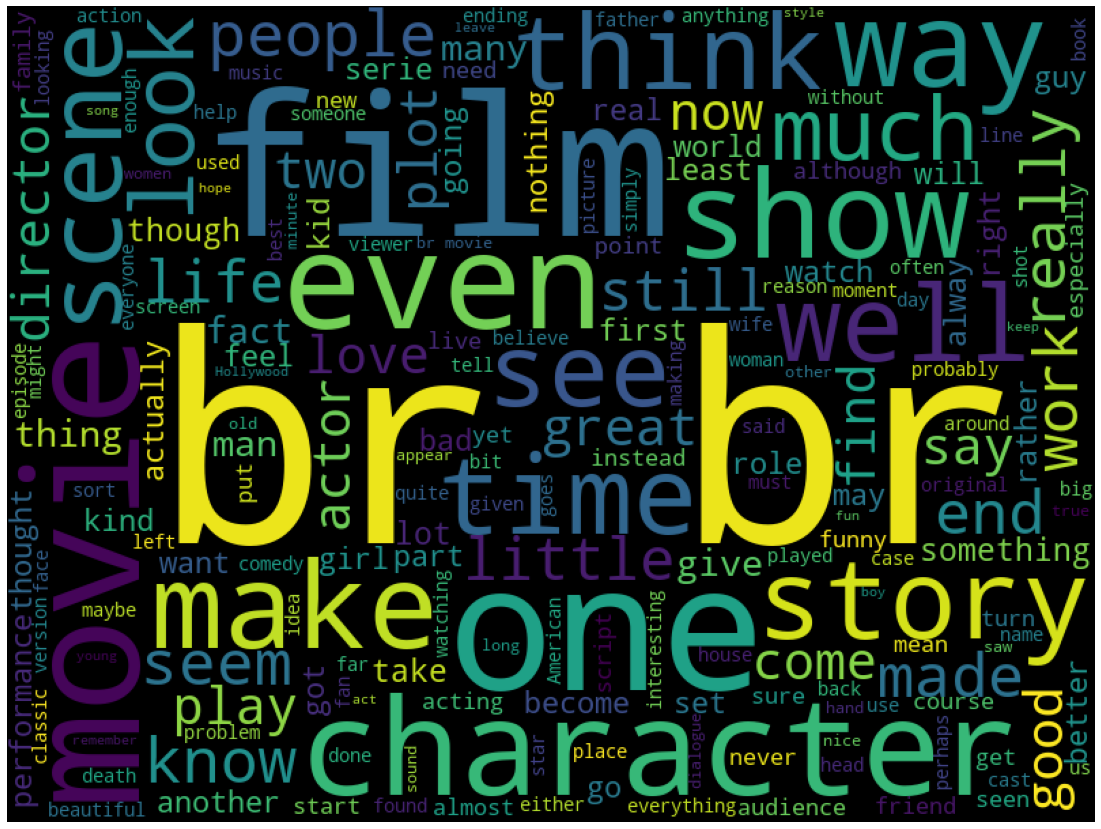

In [ ]:
from wordcloud import WordCloud

cloud = WordCloud(width = 800, height = 600).generate(' '.join(train_data['review']))
plt.figure(figsize = (20, 15))
plt.imshow(cloud)
plt.axis('off')

12500 12500


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


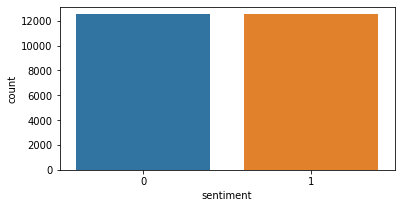

In [ ]:
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])

print(train_data['sentiment'].value_counts()[1], train_data['sentiment'].value_counts()[0])
# 감정 label 분포확인

In [ ]:
# 띄어쓰기 기준으로 단어의 길이를 가지는 변수 설정
train_word_counts = train_data['review'].apply(lambda x: len(x.split(' ')))

Text(0, 0.5, 'Number of words')

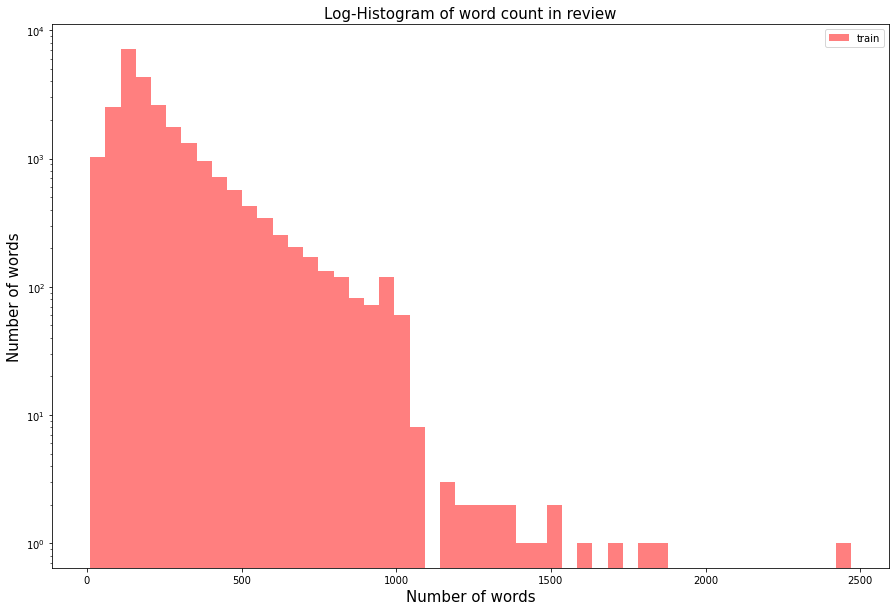

In [ ]:
# 단어 길이 재시각화
plt.figure(figsize = (15, 10))
plt.hist(train_word_counts, bins = 50, alpha = 0.5, color = 'r', label = 'train')
plt.yscale('log', nonposy = 'clip')
plt.legend()
plt.title('Log-Histogram of word count in review', fontsize = 15)
plt.xlabel('Number of words', fontsize = 15)
plt.ylabel('Number of words', fontsize = 15)

In [ ]:
train_word_counts.describe()

count    25000.000000
mean       233.786240
std        173.745845
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: review, dtype: float64

In [ ]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) # 물음표가 마지막으로 쓰임
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper())) # 첫번째 대문자
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x]))) # 대문자 개수
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자 개수

print(qmarks, fullstop, capital_first, capitals, numbers)

0.29552 0.99688 0.0 0.99592 0.56656
